# IPOTEZA DE PIATA EFICIENTA. IPOTEZA DE RANDOM WALK

### ANALIZA COMPARATIVA ----> NETFLIX INC. VS. ETHEREUM

 ----- | ----
- | - 
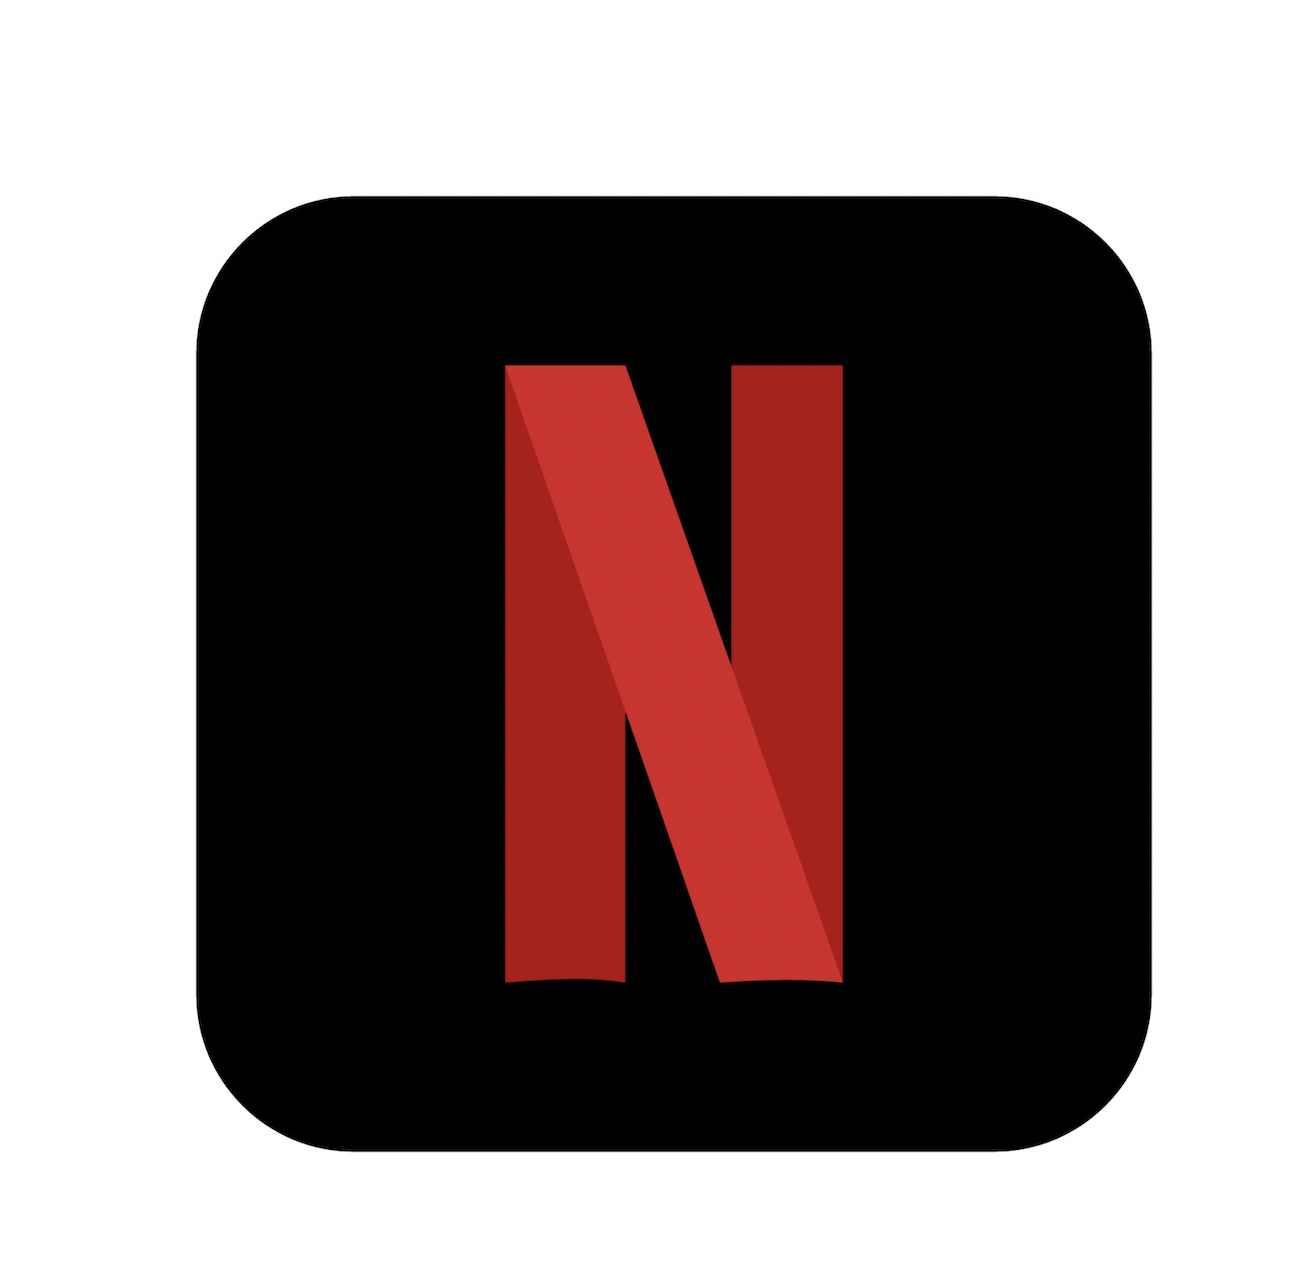| 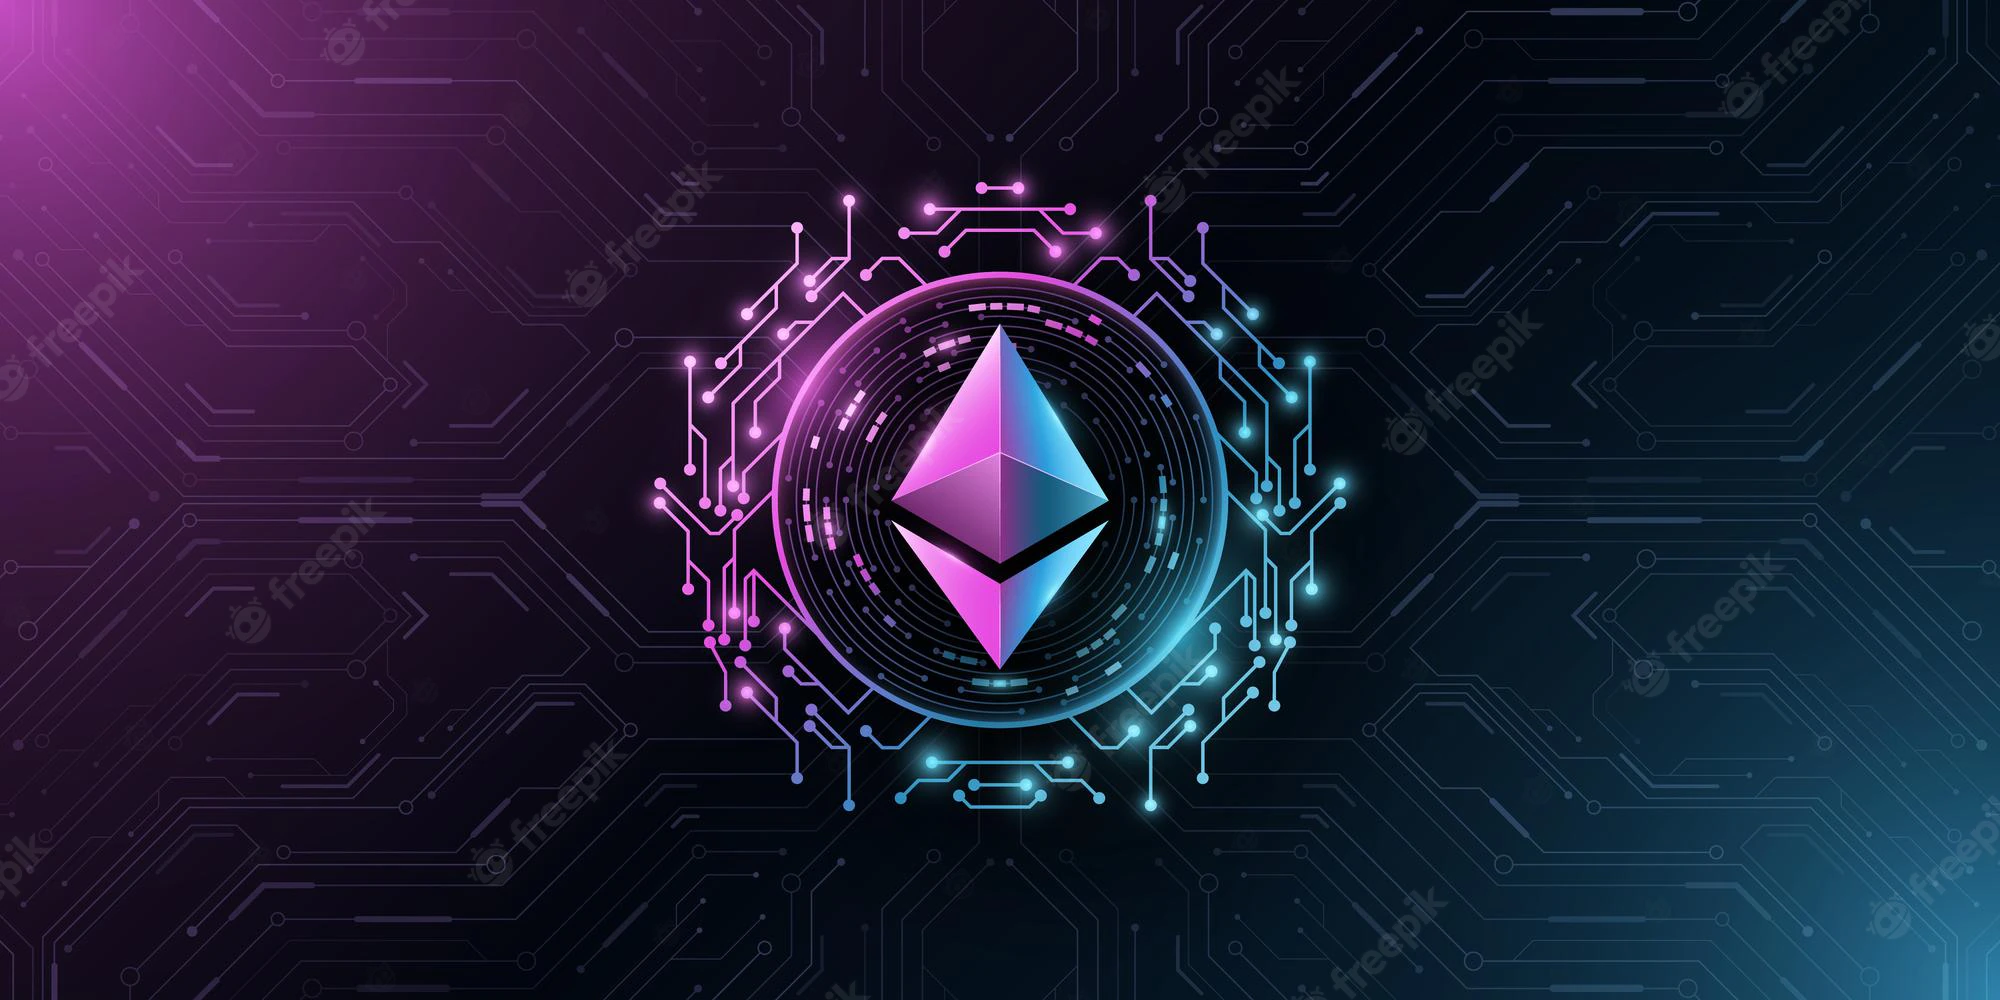

In [1]:
#! pip install yahoo_fin
#! pip install arch

In [3]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import scipy.stats as stat
import scipy
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from arch.unitroot import VarianceRatio
from yahoo_fin.stock_info import *

In [4]:
# We will look at stock prices 
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,10,1)

## NETFLIX INC


### 1. Get DATA

In [5]:
stock_NFLX = get_data('NFLX' , start_date = start, end_date = end)
stock_NFLX=stock_NFLX.dropna()
close_NFLX = pd.DataFrame(stock_NFLX["close"]).dropna()
simple_return_NFLX = close_NFLX.pct_change().dropna()
log_return_NFLX = np.log(1+simple_return_NFLX)

### 2. Exploratory Data Analysis

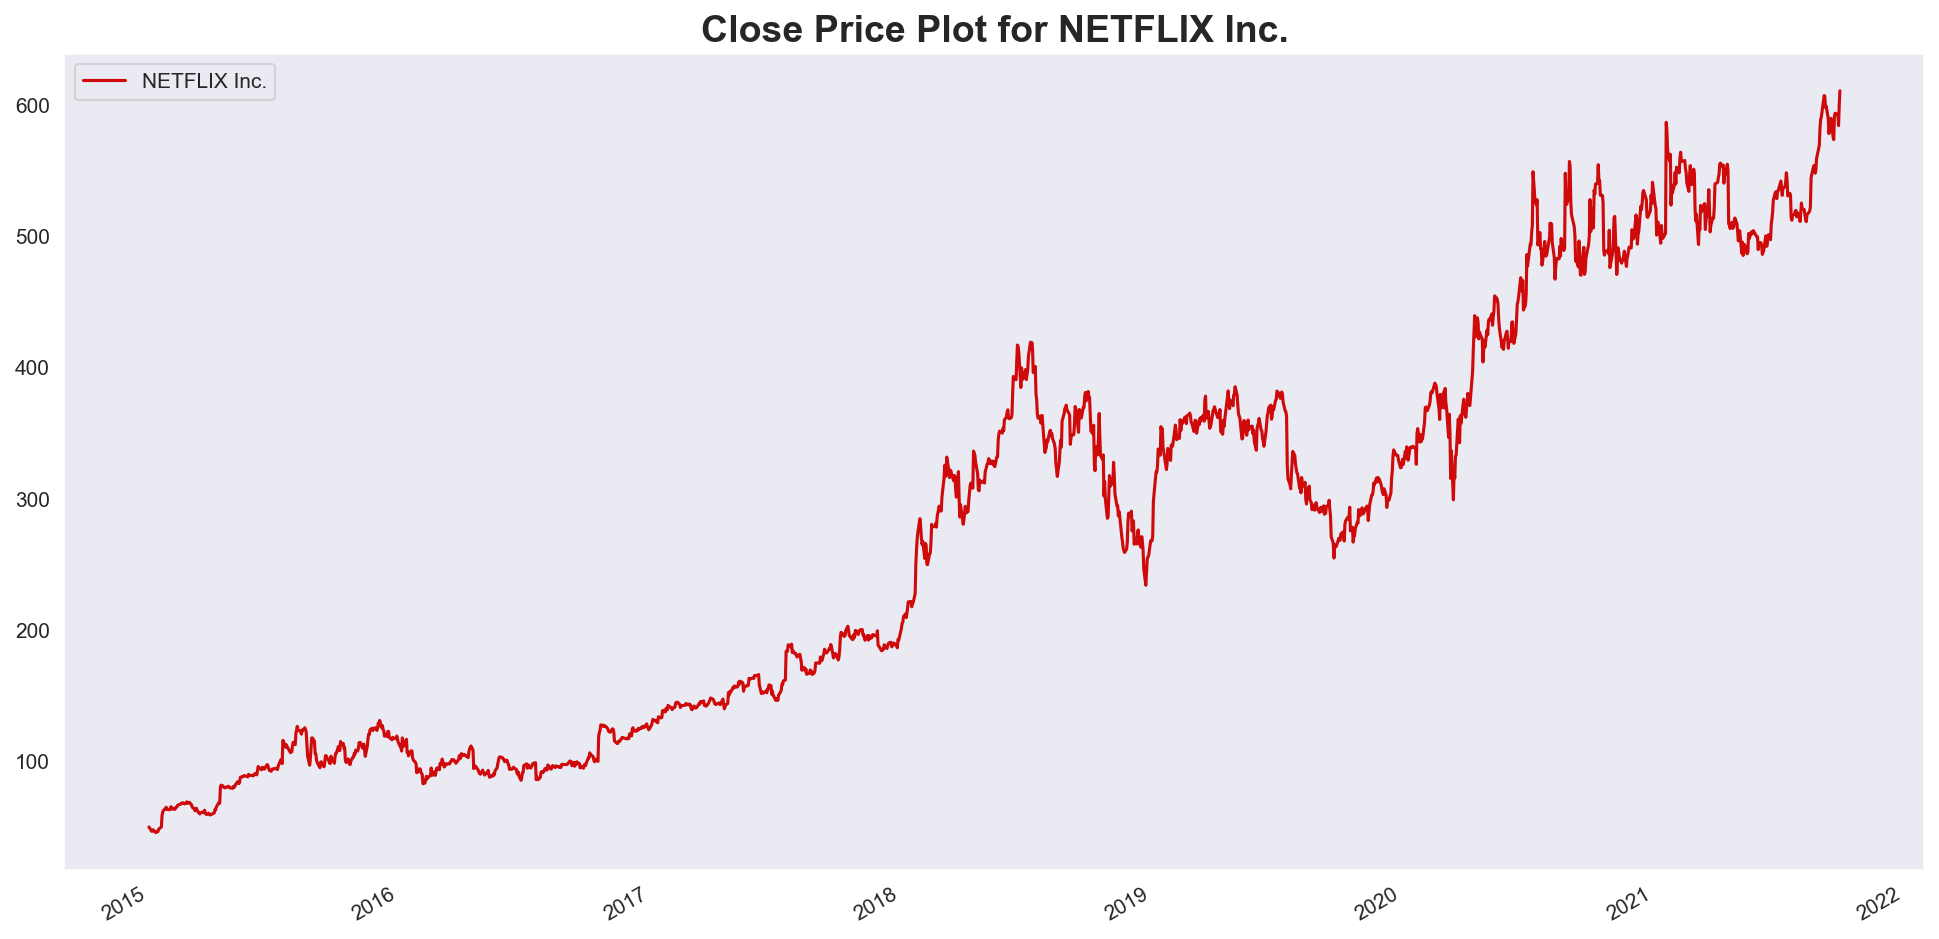

In [6]:
plt.figure(figsize=(16, 8), dpi=150)
stock_NFLX["close"].plot(label = 'NETFLIX Inc.', color = '#CF0A0A', grid = False) # Plot the closing price 
# adding title to the plot
plt.title('Close Price Plot for NETFLIX Inc.', fontweight = 'bold', fontsize=18)
# adding legend to the curve
plt.legend()

### 3. Ipoteza de piata eficienta

Clasificarea unei piete eficiente:
1. Eficienta in forma **slaba** - multimea de informatii cuprinde doar istoricul tranzactiilor;
2. Eficienta in forma **semi-tare** - multimea de informatii cuprinde: istoricul tranzactiilor + toate informatiile cu caracter public, cunoscute de toti participantii la tranzactii; 
3. Eficienta in forma **tare** - ultimea de informatii cuprinde toate informatiile cunoscute de oricare dintre actorii pietei de capital (inclusiv informatii cu caracter privat). 

Eficienta in forma slaba a unei piete depinde de testarea ipotezei ca pretul de tranzactionare este random walk; astfel, daca pretul de tranzactionare logaritmat este RW, atunci seria randamentelor este stationara, si, mai mult, este un proces de tip WN. 



### 3.1. Testarea stationaritatii

In [7]:
from arch.unitroot import ADF
adf = ADF(np.log(close_NFLX))
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.830
P-value                         0.366
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Conform testului ADF, aplicat seriei logaritmate a pretului de inchidere Netflix, se poate concluziona ca seria este **nestationara**, astfel ca pretul Netflix urmeaza un model *RW*, ceea ce implica ca seria randamentelor este *WN*. Pentru a fundamenta si mai bine aceste aspecte, se vor utiliza si testele KPSS, Variance Ratio si Ljung-Box

In [8]:
from arch.unitroot import KPSS
series = np.log(close_NFLX)

kpss = KPSS(series)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  6.021
P-value                         0.000
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


Cum valoarea lui p-value este sub pragul de 5%, iar valorile critice sunt inferioare valorii statistice LM, se va respinge ipoteza nula a testului (ce implica faptul ca procesul este stationar), astfel ca seria logaritmata a pretului Netflix este **nestationara**. 

### 3.2. Individual Variance Ratio Tests

In [9]:
from arch.unitroot import VarianceRatio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


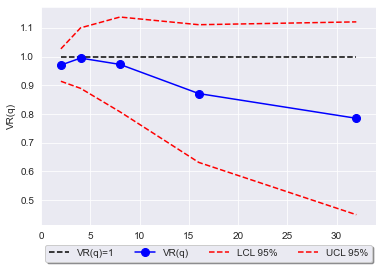

In [10]:
x = np.asarray(close_NFLX)
x = np.log(x)
N=len(x)
vr_1=[]
vrt = []
w=[]
varvrt = []
zvrt = []
q = []
lcl=[]
ucl=[]
vr_1=[]
p_value=[]
stderr=[]
alpha=0.05
k=5

def VRTest():
    for ii in range (1, k+1):
        a=2**ii
        q.append(a)
        vr = VarianceRatio(x, a)
        vrt.append(vr.vr)
        se=np.sqrt(vr._stat_variance)/np.sqrt(vr._nobs-1)
        stderr.append(se)
        lower=vr.vr-stat.norm.ppf(1-alpha/2)*se
        upper=vr.vr+stat.norm.ppf(1-alpha/2)*se
        one=1
        zvrt.append(vr.stat)
        lcl.append(lower)
        ucl.append(upper)
        vr_1.append(one)
        p_value.append(vr.pvalue)

    return vrt,p_value,zvrt,q,stderr 
VRTest()

confidence=1-alpha
%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(min(lcl), max(ucl))
plt.xlim(0, 2**k+2)
plt.xlabel( 'q' )
plt.ylabel( 'VR(q)' )
plt.plot(q, vr_1,color='black', linestyle='dashed', label='VR(q)=1')
plt.plot(q, vrt, color='blue', marker='o',markerfacecolor='blue', markersize=8,label='VR(q)')
plt.plot(q, lcl,color='red', linestyle='dashed', label='LCL ' +str('{:.0%}'.format(confidence)))
plt.plot(q, ucl,color='red', linestyle='dashed', label='UCL ' +str('{:.0%}'.format(confidence)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),fancybox=True, shadow=True, ncol=5)

plt.show()

In [11]:
results_NFLX=pd.DataFrame(columns=['q','VR test', 'Std. Error','z statistic', 'P-value'])
results_NFLX['q']=q
results_NFLX['VR test']=vrt
results_NFLX['Std. Error']=stderr
results_NFLX['z statistic']=zvrt
results_NFLX['P-value']=p_value

In [12]:
%%latex
\[\left\{ \begin{align}
  & {{H}_{0i}}:VR({{q}_{i}})=1 \\ 
 & {{H}_{Ai}}:VR({{q}_{i}})\ne 1 \\ 
\end{align} \right.\]

<IPython.core.display.Latex object>

In [13]:
results_NFLX

,q,VR test,Std. Error,z statistic,P-value
0,2,0.970379,0.028842,-1.027036,0.304403
1,4,0.994688,0.053780,-0.098763,0.921326
2,8,0.972639,0.084256,-0.324735,0.745382
3,16,0.871093,0.122400,-1.053165,0.292265
4,32,0.784941,0.171397,-1.254742,0.209572


Testul Variance Ratio indica existenta unui proces RW ce presupune homoscedasticitate (aspect testat prin ipoteza nula). Cum valorile lui p-value sunt superioare pragului de semnificatie de 5%, ipoteza nula a testului nu va fi respinsa, ceea ce inseamna ca putem vorbi despre o piata cu eficienta slaba, insa acest aspect trebuie confirmat si de *SMM Test* si *Multiple Variance Ratio Test - Wald Test*

### 3.3.1 Multiple Variance Ratio Test - Studentized Maximum Modulus

In [14]:
z=abs(results_NFLX["z statistic"]).max()
alpha_star=1-(1-alpha)**(1/k)
alpha_star
z_star=stat.norm.ppf(1-alpha_star/2)
z_star

mvr=pd.DataFrame(columns=['z Statistic','Critical z','Decision'])
mvr.at[0,'z Statistic']=z
mvr['Critical z']=z_star
if z<z_star:
    mvr['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvr['Decision']="Reject the null hypothesis of random walk"
mvr

,z Statistic,Critical z,Decision
0,1.254742,2.568763,Cannot reject the null hypothesis of random walk


Rezultatele testului Studentized Maximum Modulus confirma existenta modelului de **random walk** pentru cazul pretului Netflix, fapt evidentiat prin faptul ca nu se poate respinge ipoteza nula, ceea ce inseamna ca avem de a face cu o **piata eficienta in forma slaba**.

### 3.3.2 Multiple Variance Ratio Test - Wald Test

In [15]:
#Compute the covariance matrix
cov1=np.zeros((k,k))

q=np.asarray(q)

for i in range (0,k-1):
    for j in range (i+1,k):
        cov1[i][j]=2*(3*q[j]-q[i]-1)*(q[i]-1)/(3*q[j])
cov2=np.transpose(cov1)
cov=cov1+cov2

for i in range (0,k):
    #for j in range (i+1,k):
  
    cov[i][i]=2*(2*q[i]-1)*(q[i]-1)/(3*q[i])
    
Wald_Test=np.matmul(np.asarray(vrt)-1,np.linalg.inv(cov))
                    
Wald_Test=N*np.matmul(Wald_Test,np.transpose(np.asarray(vrt)-1))

p_val= 1-stat.chi2.cdf(Wald_Test,k)

mvrw=pd.DataFrame(columns=['Wald Test','Critical Chi2','P-value','Decision'])
mvrw.at[0,'Wald Test']=Wald_Test
mvrw['Critical Chi2']=stat.chi2.ppf(alpha/2,k)
mvrw['P-value']=p_val
if p_val>0.05:
    mvrw['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvrw['Decision']="Reject the null hypothesis of random walk"
mvrw

,Wald Test,Critical Chi2,P-value,Decision
0,7.693997,0.831212,0.173926,Cannot reject the null hypothesis of random walk


Astfel, pentru cei 7 ani analizati (2015-2021), seria pretului Netflix respecta ipoteza de piata eficienta in **forma slaba**. 

# ETHEREUM USD

### 1. Get DATA

In [16]:
stock_ETH = get_data('ETH-USD' , start_date = start, end_date = end)
stock_ETH=stock_ETH.dropna()
close_ETH = pd.DataFrame(stock_ETH["close"]).dropna()
simple_return_ETH = close_ETH.pct_change().dropna()
log_return_ETH = np.log(1+simple_return_ETH)

### 2. Exploratory Data Analysis

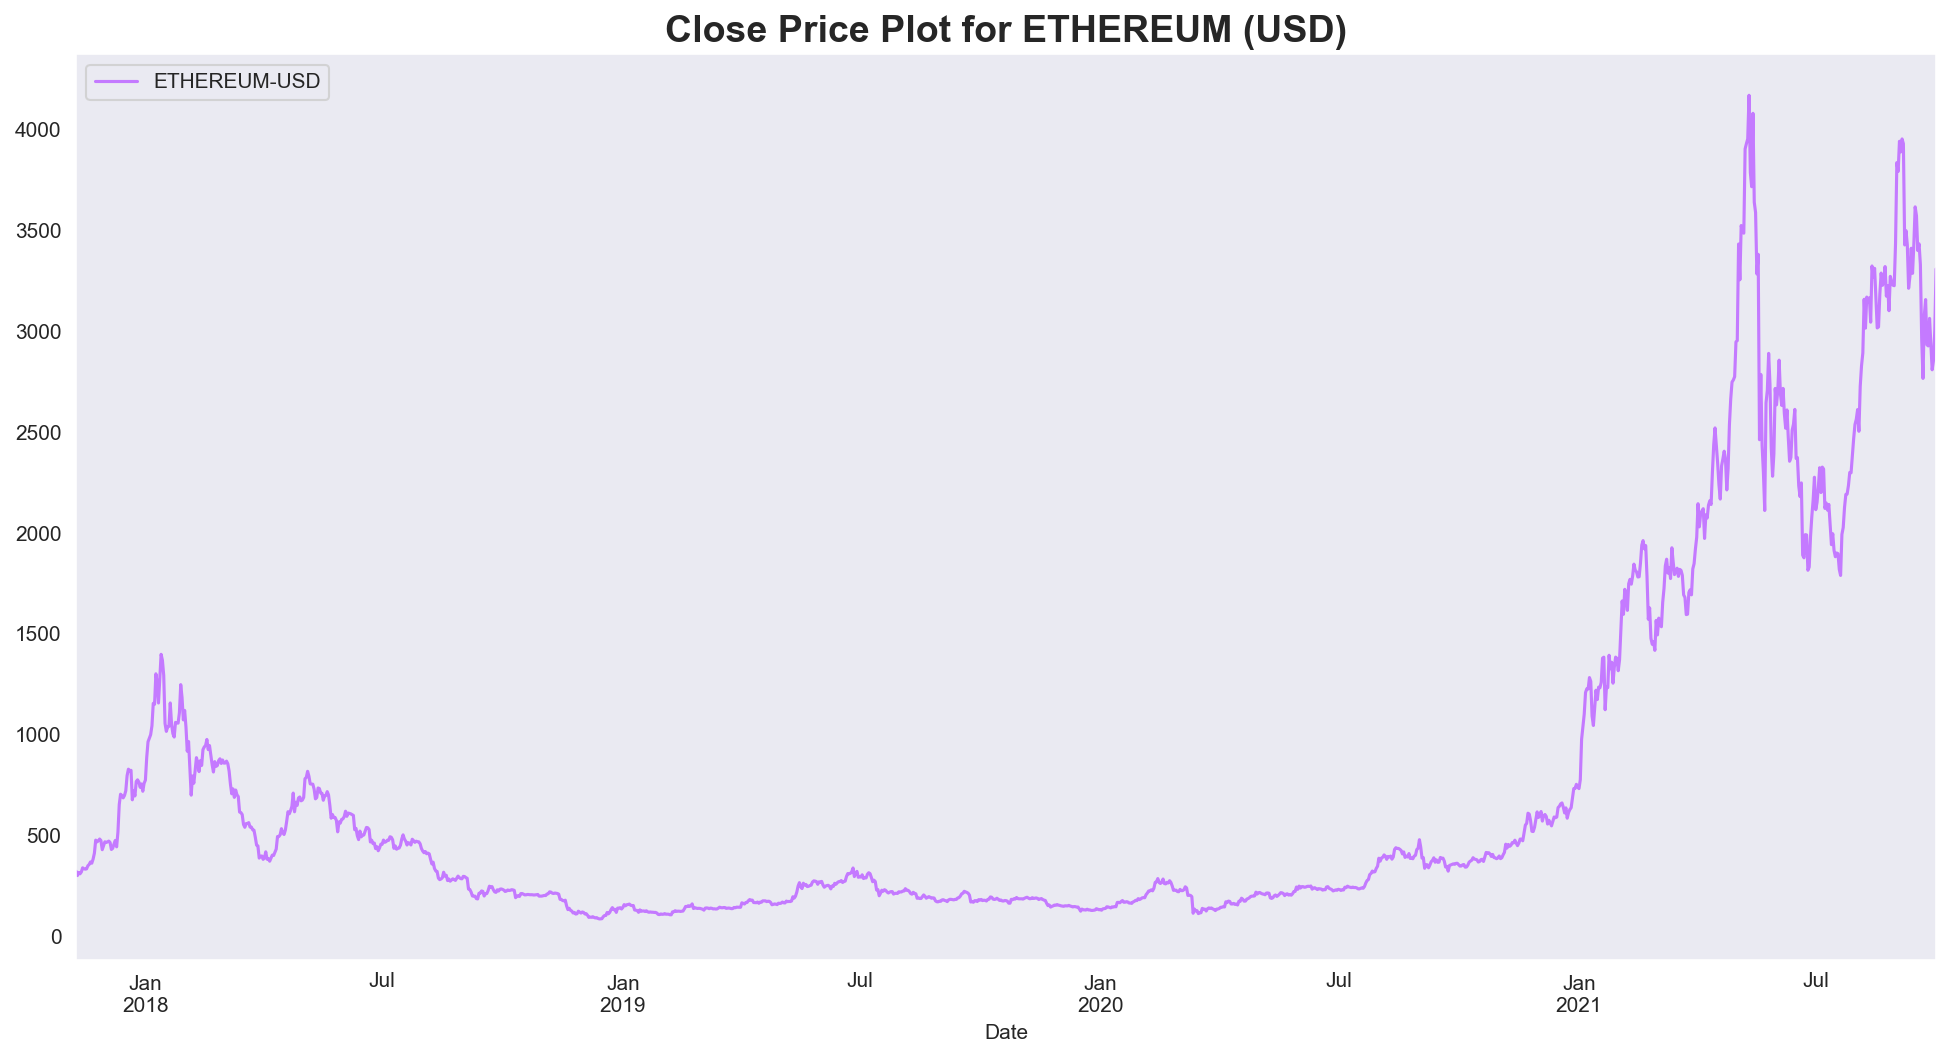

In [17]:
plt.figure(figsize=(16, 8), dpi=150)
stock_ETH["close"].plot(label = 'ETHEREUM-USD', color = '#C47AFF', grid = False) # Plot the adjusted closing price 
# adding title to the plot
plt.title('Close Price Plot for ETHEREUM (USD)', fontweight = 'bold', fontsize=18)
# adding Label to the x-axis
plt.xlabel('Date')
# adding legend to the curve
plt.legend()


### 3. Ipoteza de piata eficienta

### 3.1. Testarea stationaritatii

In [18]:
from arch.unitroot import ADF
adf = ADF(np.log(close_ETH))
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.132
P-value                         0.946
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Conform testului ADF, aplicat seriei logaritmate a pretului de inchidere Ethereum, se poate concluziona ca seria este **nestationara**, astfel ca pretul Ethereum urmeaza un model *RW*, ceea ce implica ca seria randamentelor este *WN*. Pentru a fundamenta si mai bine aceste aspecte, se vor utiliza si testele KPSS, Variance Ratio si Ljung-Box

In [19]:
from arch.unitroot import KPSS
series = np.log(close_ETH)

kpss = KPSS(series)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  2.102
P-value                         0.000
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


Cum valoarea lui p-value este sub pragul de 5%, iar valorile critice sunt inferioare valorii statistice LM, se va respinge ipoteza nula a testului (ce implica faptul ca procesul este stationar), astfel ca seria logaritmata a pretului Ethereum este **nestationara**. 

### 3.2 Individual Variance Ratio Tests

In [20]:
from arch.unitroot import VarianceRatio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


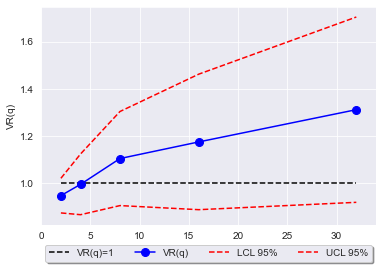

In [21]:
x = np.asarray(close_ETH)
x = np.log(x)
N=len(x)
vr_1=[]
vrt = []
w=[]
varvrt = []
zvrt = []
q = []
lcl=[]
ucl=[]
vr_1=[]
p_value=[]
stderr=[]
alpha=0.05
k=5

def VRTest():
    for ii in range (1, k+1):
        a=2**ii
        q.append(a)
        vr = VarianceRatio(x, a)
        vrt.append(vr.vr)
        se=np.sqrt(vr._stat_variance)/np.sqrt(vr._nobs-1)
        stderr.append(se)
        lower=vr.vr-stat.norm.ppf(1-alpha/2)*se
        upper=vr.vr+stat.norm.ppf(1-alpha/2)*se
        one=1
        zvrt.append(vr.stat)
        lcl.append(lower)
        ucl.append(upper)
        vr_1.append(one)
        p_value.append(vr.pvalue)

    return vrt,p_value,zvrt,q,stderr 
VRTest()

confidence=1-alpha
%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(min(lcl), max(ucl))
plt.xlim(0, 2**k+2)
plt.xlabel( 'q' )
plt.ylabel( 'VR(q)' )
plt.plot(q, vr_1,color='black', linestyle='dashed', label='VR(q)=1')
plt.plot(q, vrt, color='blue', marker='o',markerfacecolor='blue', markersize=8,label='VR(q)')
plt.plot(q, lcl,color='red', linestyle='dashed', label='LCL ' +str('{:.0%}'.format(confidence)))
plt.plot(q, ucl,color='red', linestyle='dashed', label='UCL ' +str('{:.0%}'.format(confidence)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),fancybox=True, shadow=True, ncol=5)

plt.show()

In [22]:
results_ETH=pd.DataFrame(columns=['q','VR test', 'Std. Error','z statistic', 'P-value'])
results_ETH['q']=q
results_ETH['VR test']=vrt
results_ETH['Std. Error']=stderr
results_ETH['z statistic']=zvrt
results_ETH['P-value']=p_value

In [23]:
%%latex
\[\left\{ \begin{align}
  & {{H}_{0i}}:VR({{q}_{i}})=1 \\ 
 & {{H}_{Ai}}:VR({{q}_{i}})\ne 1 \\ 
\end{align} \right.\]

<IPython.core.display.Latex object>

In [24]:
results_ETH

,q,VR test,Std. Error,z statistic,P-value
0,2,0.948318,0.037420,-1.381138,0.167237
1,4,0.996179,0.065658,-0.058198,0.953591
2,8,1.105354,0.101673,1.036213,0.300103
3,16,1.175778,0.146449,1.200270,0.230034
4,32,1.312357,0.200238,1.559926,0.118777


Testul Variance Ratio indica existenta unui proces RW ce presupune homoscedasticitate (aspect testat prin ipoteza nula). Cum valorile lui p-value sunt superioare pragului de semnificatie de 5%, ipoteza nula a testului nu va fi respinsa, ceea ce inseamna ca putem vorbi despre o piata cu eficienta slaba, insa acest aspect trebuie confirmat si de *SMM Test* si *Multiple Variance Ratio Test - Wald Test*

### 3.3.1 Multiple Variance Ratio Test - Studentized Maximum Modulus

In [25]:
z=abs(results_ETH["z statistic"]).max()
alpha_star=1-(1-alpha)**(1/k)
alpha_star
z_star=stat.norm.ppf(1-alpha_star/2)
z_star

mvr=pd.DataFrame(columns=['z Statistic','Critical z','Decision'])
mvr.at[0,'z Statistic']=z
mvr['Critical z']=z_star
if z<z_star:
    mvr['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvr['Decision']="Reject the null hypothesis of random walk"
mvr

,z Statistic,Critical z,Decision
0,1.559926,2.568763,Cannot reject the null hypothesis of random walk


Rezultatele testului Studentized Maximum Modulus confirma existenta modelului de **random walk** pentru cazul pretului Ethereum, fapt evidentiat prin faptul ca nu se poate respinge ipoteza nula, ceea ce inseamna ca avem de a face cu o **piata eficienta in forma slaba**.

### 3.3.2 Multiple Variance Ratio Test - Wald Test

In [26]:
#Compute the covariance matrix
cov1=np.zeros((k,k))

q=np.asarray(q)

for i in range (0,k-1):
    for j in range (i+1,k):
        cov1[i][j]=2*(3*q[j]-q[i]-1)*(q[i]-1)/(3*q[j])
cov2=np.transpose(cov1)
cov=cov1+cov2

for i in range (0,k):
    #for j in range (i+1,k):
  
    cov[i][i]=2*(2*q[i]-1)*(q[i]-1)/(3*q[i])
    
Wald_Test=np.matmul(np.asarray(vrt)-1,np.linalg.inv(cov))
                    
Wald_Test=N*np.matmul(Wald_Test,np.transpose(np.asarray(vrt)-1))

p_val= 1-stat.chi2.cdf(Wald_Test,k)

mvrw=pd.DataFrame(columns=['Wald Test','Critical Chi2','P-value','Decision'])
mvrw.at[0,'Wald Test']=Wald_Test
mvrw['Critical Chi2']=stat.chi2.ppf(alpha/2,k)
mvrw['P-value']=p_val
if p_val>0.05:
    mvrw['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvrw['Decision']="Reject the null hypothesis of random walk"
mvrw

,Wald Test,Critical Chi2,P-value,Decision
0,15.401932,0.831212,0.008776,Reject the null hypothesis of random walk


Astfel, pentru cei 7 ani analizati (2015-2021), in cazul testului MVR Wald Test se respinge ipoteza nula.

# CONCLUZII 

|  | NETFLIX Inc. | ETHEREUM |
| --- | --- | --- |
| *Testarea stationaritatii* | 
| -> ADF | seria logaritmata a pretului este nestationara, RW => seria randamentelor este WN | seria logaritmata a pretului este nestationara, RW => seria randamentelor este WN  |
| -> KPSS | seria logaritmata a pretului este nestationara| seria logaritmata a pretului este nestationara |
| *Individual Variance Ratio Tests* | nu se respinge H0, piata cu eficienta slaba | nu se respinge H0, piata cu eficienta slaba  |
| *Multiple Variance Ratio Tests* |  
| -> Studentized Maximum Modulus | nu se respinge H0, model RW pentru pret | nu se respinge H0, model RW pentru pret |
| -> Wald Test | nu se respinge H0, model RW pentru pret | **se respinge H0**|
| Piata cu eficienta| **slaba**| **slaba**|

## Q: Cum s-ar testa ipoteza de eficienta in forma semi-tare?

Ipoteza de piata cu eficienta **semi-tare** este caracterizata de istoricul tranzactiilor si de faptul ca toate informatiile cu caracter public sunt cunoscute de toti participantii la tranzactii. 

Testarea ipotezei s-ar putea realiza prin luarea in considerare a unor evenimente de interes pentru Netflix si Ethereum, iar anunturile ce insotesc evenimentele sa fie incadrate in cateva categorii cheie, cum ar fi: impact bun, rau sau neutru, in functie de o valoare stabilita. 